In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
PH = 60
patient_list = [559, 570, 588, 563, 575, 591]
patient_list = [540,544,552,567,584,596]
# patient_list = [540]

df_full = pd.DataFrame()
for patN in patient_list:
    # Read data
    patient = str(patN)
    data_tr = pd.read_csv(F'data/ohio{patient}_Training.txt')
    # Load training results
    out_str = 'single_output'
    results = np.load(os.path.join('results','hpar_full_selection','results_training.'+patient+'.ph'+str(PH)+'.'+out_str+'.npy'),allow_pickle='TRUE').item()
    df = pd.DataFrame.from_dict(results)
    df['to_use'] = [','.join(l) for l in df['to_use']] # converts list to string
    df['patN'] = patN
    # normalize score with min-max scaling
    x = MinMaxScaler().fit_transform(df['val_loss'].values.reshape(-1,1))
    df['val_loss'] = x
    # concatenate patient results
    df_full = pd.concat([df_full, df])

df = df_full

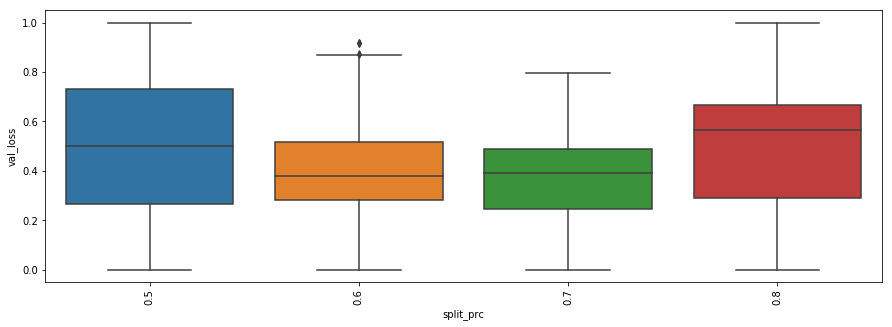

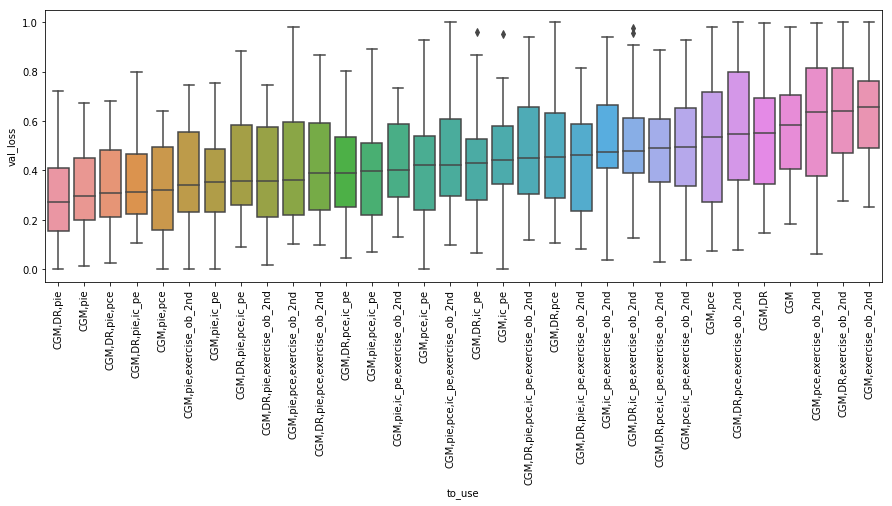

In [3]:
figsize = [15,5]

fig, ax = plt.subplots(1,1,figsize=figsize)
sns.boxplot(x='split_prc', y="val_loss", data=df)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

fig, ax = plt.subplots(1,1,figsize=figsize)
my_order = df.groupby(by=["to_use"])["val_loss"].median().sort_values().index
sns.boxplot(x='to_use', y="val_loss", data=df, order=my_order)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

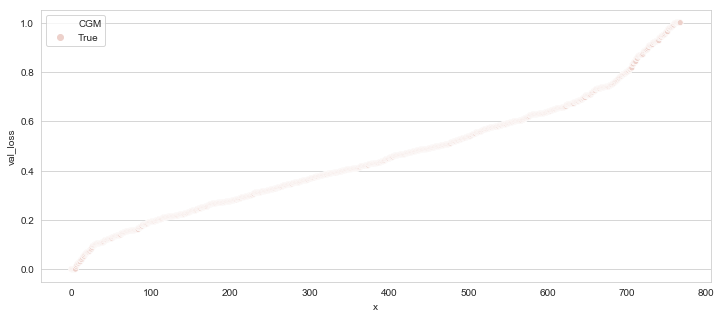

In [4]:
sns.set_style("whitegrid")

figsize = [12,5]
fig, ax = plt.subplots(1,1,figsize=figsize)
df_view = df.sort_values(by=["val_loss"])

feat = 'CGM'
df_view.loc[:,feat] = [(feat in x) for x in df_view['to_use']]

df_view.loc[:,'x'] = np.arange(0,len(df_view['val_loss']),1)
sns.scatterplot(x='x', y="val_loss", data=df_view, hue=feat)
ax.grid(axis='x')

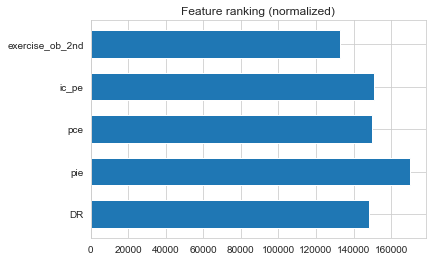

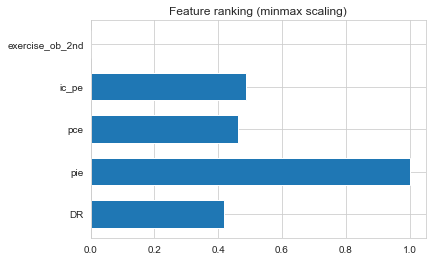

In [5]:
feat_importance = {}

full_feat_set = ['CGM','DR','pie','pce','ic_pe','exercise_ob_2nd','basis_heart_rate']
full_feat_set = ['DR','pie','pce','ic_pe','exercise_ob_2nd']

for feat in full_feat_set:
    n = 0
    for k, el in enumerate(df_view['to_use']):
        if feat in el:
            n = n + (len(df_view['to_use']) - k)
    feat_importance[feat] = n

feature_names = [x for x in feat_importance.keys()]

def minmaxscaler(x):
    return (x - min(x)) / (max(x - min(x)))

feat_importance = np.array(list(feat_importance.values()))
# foo = minmaxscaler(feat_importance)
foo = feat_importance

# plot figure
fig, ax = plt.subplots(1,1)
x = np.arange(0, len(foo), 1)
ax.barh(x, foo, 0.65)
ax.set_yticks(x)
ax.set_yticklabels(feature_names)
ax.set_title('Feature ranking (normalized)')
ax.grid(b=True, which='major', axis='both')

# plot figure
fig, ax = plt.subplots(1,1)
x = np.arange(0, len(foo), 1)
ax.barh(x, minmaxscaler(foo), 0.65)
ax.set_yticks(x)
ax.set_yticklabels(feature_names)
ax.set_title('Feature ranking (minmax scaling)')
ax.grid(b=True, which='major', axis='both')

In [6]:
df.groupby('to_use').mean().sort_values('val_loss')

,val_loss,split_prc,patN
to_use,,,
"CGM,DR,pie",0.301932,0.65,563.833333
"CGM,pie,pce",0.320158,0.65,563.833333
"CGM,pie",0.322364,0.65,563.833333
"CGM,DR,pie,pce",0.341148,0.65,563.833333
"CGM,pie,ic_pe",0.361729,0.65,563.833333
"CGM,DR,pie,ic_pe",0.363408,0.65,563.833333
"CGM,DR,pie,exercise_ob_2nd",0.386937,0.65,563.833333
"CGM,pie,exercise_ob_2nd",0.390359,0.65,563.833333
"CGM,DR,pce,ic_pe",0.392872,0.65,563.833333
